# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Base url
url = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}&q="

# List of city data
cityData = []

# Grouping variables
# Group
set_count = 1
# Record within group
record = 1

print("Beginning Data Retrieval")
print("--------------------------------")

for i, city in enumerate(cities):
    # group the cities in sets of 50
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record = 1
        
    # Output the record and group being processed
    print(f"Processing Record {record} of Set {set_count} | {city}")
    
    # Increase record number in the set
    record += 1
    
    # Create URL that includes city
    cityURL = url + city
    
    # Call the OpenWeather API
    try:
        cityWeather = requests.get(cityURL).json()
        
        # Parse out data
        lat = cityWeather["coord"]["lat"]
        lng = cityWeather["coord"]["lon"]
        maxTemp = cityWeather["main"]["temp_max"]
        humidity = cityWeather["main"]["humidity"]
        cloudiness = cityWeather["clouds"]["all"]
        windspeed = cityWeather["wind"]["speed"]
        country = cityWeather["sys"]["country"]
        date = cityWeather["dt"]
        
        cityData.append({"City": city,
                        "Lat": lat,
                        "Lng": lng,
                        "Max Temp": maxTemp,
                        "Humidity": humidity,
                        "Cloudiness": cloudiness,
                        "Wind Speed": windspeed,
                         "Country": country, 
                        "Date": date})
    except:
        print(f"{city} not found. Skipping...")
        pass

Beginning Data Retrieval
--------------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | banda aceh
Processing Record 4 of Set 1 | tura
Processing Record 5 of Set 1 | urusha
Processing Record 6 of Set 1 | batagay
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | amderma
amderma not found. Skipping...
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | kalabo
Processing Record 11 of Set 1 | vardo
Processing Record 12 of Set 1 | ixtapa
Processing Record 13 of Set 1 | gigmoto
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | louisbourg
louisbourg not found. Skipping...
Processing Record 16 of Set 1 | bandarbeyla
Processing Record 17 of Set 1 | sioux lookout
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | la tuque
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 |

Processing Record 33 of Set 4 | ahipara
Processing Record 34 of Set 4 | novodmitriyevskaya
Processing Record 35 of Set 4 | assiniboia
Processing Record 36 of Set 4 | hobart
Processing Record 37 of Set 4 | fairbanks
Processing Record 38 of Set 4 | honningsvag
Processing Record 39 of Set 4 | iqaluit
Processing Record 40 of Set 4 | salinas
Processing Record 41 of Set 4 | chagda
chagda not found. Skipping...
Processing Record 42 of Set 4 | hua hin
Processing Record 43 of Set 4 | fare
Processing Record 44 of Set 4 | porto de moz
Processing Record 45 of Set 4 | denpasar
Processing Record 46 of Set 4 | bagdarin
Processing Record 47 of Set 4 | waipawa
Processing Record 48 of Set 4 | uglich
Processing Record 49 of Set 4 | nabire
Processing Record 50 of Set 4 | khuzdar
Processing Record 1 of Set 5 | omboue
Processing Record 2 of Set 5 | bathsheba
Processing Record 3 of Set 5 | alim
Processing Record 4 of Set 5 | port-gentil
Processing Record 5 of Set 5 | beloha
Processing Record 6 of Set 5 | kon

Processing Record 24 of Set 8 | birjand
Processing Record 25 of Set 8 | makakilo city
Processing Record 26 of Set 8 | okakarara
Processing Record 27 of Set 8 | liyang
Processing Record 28 of Set 8 | airai
Processing Record 29 of Set 8 | winona
Processing Record 30 of Set 8 | talnakh
Processing Record 31 of Set 8 | inzer
Processing Record 32 of Set 8 | kaitangata
Processing Record 33 of Set 8 | sedro-woolley
Processing Record 34 of Set 8 | kidal
Processing Record 35 of Set 8 | batemans bay
Processing Record 36 of Set 8 | pokhara
Processing Record 37 of Set 8 | saint-louis
Processing Record 38 of Set 8 | altus
Processing Record 39 of Set 8 | cabo san lucas
Processing Record 40 of Set 8 | gillette
Processing Record 41 of Set 8 | lavrentiya
Processing Record 42 of Set 8 | alotau
alotau not found. Skipping...
Processing Record 43 of Set 8 | khomutovo
Processing Record 44 of Set 8 | pemba
Processing Record 45 of Set 8 | okha
Processing Record 46 of Set 8 | burnie
Processing Record 47 of Set 

Processing Record 16 of Set 12 | sabha
Processing Record 17 of Set 12 | dzhusaly
dzhusaly not found. Skipping...
Processing Record 18 of Set 12 | jabinyanah
Processing Record 19 of Set 12 | kashi
Processing Record 20 of Set 12 | linjiang
Processing Record 21 of Set 12 | price
Processing Record 22 of Set 12 | sheridan
Processing Record 23 of Set 12 | krasnyy yar
Processing Record 24 of Set 12 | pirgos
Processing Record 25 of Set 12 | figeac
Processing Record 26 of Set 12 | baruun-urt
Processing Record 27 of Set 12 | upanema
Processing Record 28 of Set 12 | murwillumbah
Processing Record 29 of Set 12 | bignona
Processing Record 30 of Set 12 | snezhnogorsk
Processing Record 31 of Set 12 | killybegs
Processing Record 32 of Set 12 | marfino
Processing Record 33 of Set 12 | faya
Processing Record 34 of Set 12 | ponta delgada
Processing Record 35 of Set 12 | simoes
Processing Record 36 of Set 12 | mizdah
Processing Record 37 of Set 12 | guaruja
Processing Record 38 of Set 12 | muskogee
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Creates a data frame out of the raw data, and exports it as a csv
cityData_df = pd.DataFrame(cityData)
cityData_df.to_csv(output_data_file)

In [6]:
# Displays the data frame
cityData_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.2078,-159.7750,82.40,69,40,20.71,CK,1619136187
1,bethel,41.3712,-73.4140,39.99,52,77,3.00,US,1619136188
2,banda aceh,5.5577,95.3222,80.38,79,96,10.67,ID,1619135888
3,tura,25.5198,90.2201,69.46,61,32,1.79,IN,1619136188
4,urusha,54.0500,122.9000,30.52,38,79,8.30,RU,1619136188
...,...,...,...,...,...,...,...,...,...
553,borgomanero,45.7024,8.4581,50.00,73,7,4.88,IT,1619136336
554,independence,39.0911,-94.4155,54.00,47,90,10.36,US,1619136336
555,mudu,31.2520,120.5118,66.99,93,97,8.46,CN,1619136336
556,maxixe,-23.8597,35.3472,68.11,81,48,3.62,MZ,1619136337


In [7]:
cityData_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,21.780768,21.976596,58.790681,67.996416,55.422939,8.400556,1.619136e+09
std,32.769274,90.332847,19.263165,23.122808,37.301580,6.180572,7.933596e+01
min,-54.800000,-175.200000,3.020000,6.000000,0.000000,0.220000,1.619136e+09
25%,-3.766975,-61.190550,44.010000,52.000000,20.000000,4.000000,1.619136e+09
50%,27.245950,26.443450,61.025000,74.500000,66.500000,6.910000,1.619136e+09
75%,48.473800,102.441375,75.990000,86.000000,90.000000,11.495000,1.619136e+09
max,78.218600,178.416700,93.200000,100.000000,100.000000,40.310000,1.619136e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
index_humidity = cityData_df.index[cityData_df["Humidity"] >= 100].tolist()
index_humidity

[21, 216, 240, 359, 377, 379, 416, 442, 521]

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cityData_df.drop(index_humidity)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.2078,-159.7750,82.40,69,40,20.71,CK,1619136187
1,bethel,41.3712,-73.4140,39.99,52,77,3.00,US,1619136188
2,banda aceh,5.5577,95.3222,80.38,79,96,10.67,ID,1619135888
3,tura,25.5198,90.2201,69.46,61,32,1.79,IN,1619136188
4,urusha,54.0500,122.9000,30.52,38,79,8.30,RU,1619136188


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

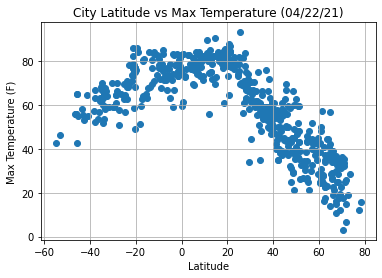

In [10]:
plt.scatter(x=clean_city_data["Lat"], y=clean_city_data["Max Temp"])
plt.title(f"City Latitude vs Max Temperature ({datetime.today().strftime('%m/%d/%y')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

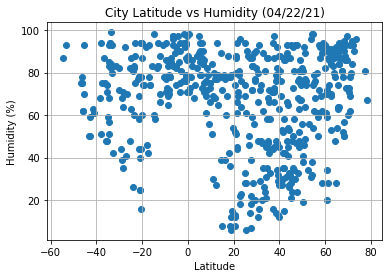

In [11]:
plt.scatter(x=clean_city_data["Lat"], y=clean_city_data["Humidity"])
plt.title(f"City Latitude vs Humidity ({datetime.today().strftime('%m/%d/%y')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

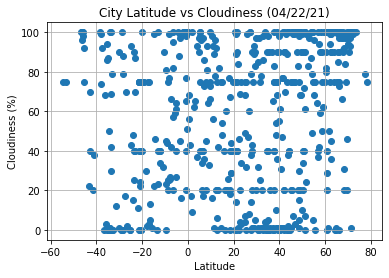

In [12]:
plt.scatter(x=clean_city_data["Lat"], y=clean_city_data["Cloudiness"])
plt.title(f"City Latitude vs Cloudiness ({datetime.today().strftime('%m/%d/%y')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

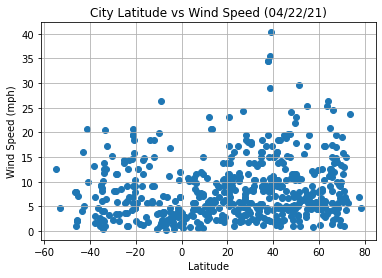

In [13]:
plt.scatter(x=clean_city_data["Lat"], y=clean_city_data["Wind Speed"])
plt.title(f"City Latitude vs Wind Speed ({datetime.today().strftime('%m/%d/%y')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

## Linear Regression

In [25]:
# Divides the data frames into northern and souther hemispheres
north_hem = clean_city_data.loc[clean_city_data["Lat"] > 0]
south_hem = clean_city_data.loc[clean_city_data["Lat"] < 0]

# Establish y values to find St. Pearson Correlation Coefficient for Latitude for Hemispheres
north_lat = north_hem["Lat"]
south_lat = south_hem["Lat"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.89


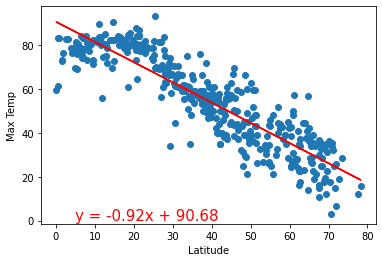

In [55]:
# Establish x value and find St. Pearson Correlation Coefficient for Max Temp
north_temp = north_hem["Max Temp"]

# Print St. Pearson Correlation Coefficient
print(f"The r-value is: {round(st.pearsonr(north_lat, north_temp)[0],2)}")

# establish linear regression values
slope, inter, r, p, std_err = st.linregress(north_lat, north_temp)

# linear regression line 
fit = slope * north_lat + inter

# Equation for slope
line_equation = "y = {:.2f}x + {:.2f}".format(slope, inter)

# scatter plot of the data
plt.scatter(x=north_hem["Lat"], y=north_hem["Max Temp"])
plt.plot(north_lat, fit, "-", color="r")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_equation, (5,0), fontsize=15, color="r")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.71


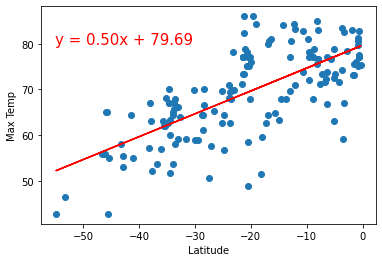

In [56]:
# Establish x value and find St. Pearson Correlation Coefficient for Max Temp
south_temp = south_hem["Max Temp"]

# Print St. Pearson Correlation Coefficient
print(f"The r-value is: {round(st.pearsonr(south_lat, south_temp)[0],2)}")

# establish linear regression values
slope, inter, r, p, std_err = st.linregress(south_lat, south_temp)

# linear regression line 
fit = slope * south_lat + inter

# Equation for slope
line_equation = "y = {:.2f}x + {:.2f}".format(slope, inter)

# scatter plot of the data
plt.scatter(x=south_hem["Lat"], y=south_hem["Max Temp"])
plt.plot(south_lat, fit, "-", color="r")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_equation, (-55,80), fontsize=15, color="r")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.89


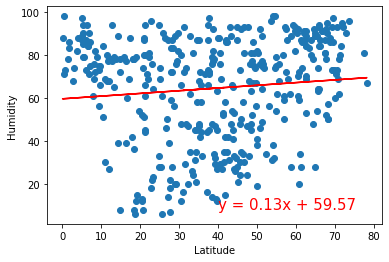

In [61]:
# Establish x value and find St. Pearson Correlation Coefficient for Humidity
north_hum = north_hem["Humidity"]

# Print St. Pearson Correlation Coefficient
print(f"The r-value is: {round(st.pearsonr(north_lat, north_temp)[0],2)}")

# establish linear regression values
slope, inter, r, p, std_err = st.linregress(north_lat, north_hum)

# linear regression line 
fit = slope * north_lat + inter

# Equation for slope
line_equation = "y = {:.2f}x + {:.2f}".format(slope, inter)

# scatter plot of the data
plt.scatter(x=north_hem["Lat"], y=north_hem["Humidity"])
plt.plot(north_lat, fit, "-", color="r")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_equation, (40,8), fontsize=15, color="r")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.27


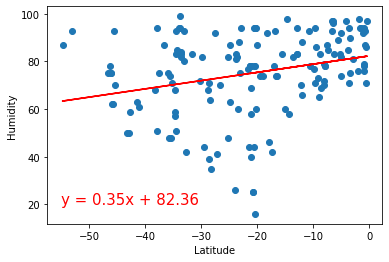

In [63]:
# Establish x value and find St. Pearson Correlation Coefficient for Humidity
south_hum = south_hem["Humidity"]

# Print St. Pearson Correlation Coefficient
print(f"The r-value is: {round(st.pearsonr(south_lat, south_hum)[0],2)}")

# establish linear regression values
slope, inter, r, p, std_err = st.linregress(south_lat, south_hum)

# linear regression line 
fit = slope * south_lat + inter

# Equation for slope
line_equation = "y = {:.2f}x + {:.2f}".format(slope, inter)

# scatter plot of the data
plt.scatter(x=south_hem["Lat"], y=south_hem["Humidity"])
plt.plot(south_lat, fit, "-", color="r")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_equation, (-55,20), fontsize=15, color="r")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression